<a href="https://colab.research.google.com/github/samp-suman/Pandas/blob/master/Pandas_Assingment_5(11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [0]:
#delivery.info()

In [0]:
# Find out the Purple cap holders for all seasons
# Q1- Purple cap holder

new=delivery.merge(match,left_on='match_id',right_on='id')
m1=new['dismissal_kind']!='retired hurt'
m2=new['dismissal_kind']!='run out'
m3=new['dismissal_kind']!='obstructing the field'
purple_cap=new[m1&m2&m3].groupby(['season','bowler'])['player_dismissed'].count().sort_values(ascending=False).reset_index().drop_duplicates(subset='season',keep='first').sort_values('season')#[['season','bowler']]
purple_cap

,season,bowler,player_dismissed
18,2008,Sohail Tanvir,22
12,2009,RP Singh,23
24,2010,PP Ojha,21
2,2011,SL Malinga,28
5,2012,M Morkel,25
0,2013,DJ Bravo,32
15,2014,MM Sharma,23
3,2015,DJ Bravo,26
13,2016,B Kumar,23
4,2017,B Kumar,26


In [0]:
# Orange cap
orange_cap=new.groupby(['season','batsman'])['batsman_runs'].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset='season',keep='first').sort_values('season')#[['season','batsman']]
orange_cap

,season,batsman,batsman_runs
10,2008,SE Marsh,616
13,2009,ML Hayden,572
9,2010,SR Tendulkar,618
11,2011,CH Gayle,608
2,2012,CH Gayle,733
3,2013,MEK Hussey,733
6,2014,RV Uthappa,660
17,2015,DA Warner,562
0,2016,V Kohli,973
7,2017,DA Warner,641


In [0]:
# Q2-- Find top 10 batsman(on the basis of total runs) and top 10 bowlers(in terms of total wickets) 
#      and create a heatmap where the value col will hold the batsman runs ka sum

# For top batsmans
top_batsman=delivery.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
batsman_list=top_batsman.index.tolist() #-- makig list of top batsmans

In [0]:
# For top bowlers
m1=delivery['dismissal_kind']!='retired hurt'
m2=delivery['dismissal_kind']!='run out'
m3=delivery['dismissal_kind']!='obstructing the field'

top_bowler=delivery[m1&m2&m3].groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)
bowler_list=top_bowler.index.tolist()#-- makig list of top bowlers

In [0]:
# Masking 
bats=delivery['batsman'].isin(batsman_list)
bowl=delivery['bowler'].isin(bowler_list)

In [0]:
# making pivot table on masked data
pt=delivery[bats&bowl].pivot_table(index='batsman',columns='bowler',values='batsman_runs',aggfunc='sum')

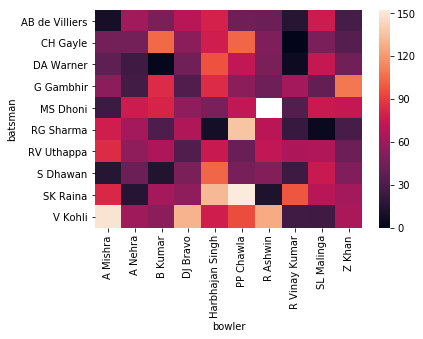

In [0]:
sns.heatmap(pt)